In [64]:
import numpy as np
import fuller
from fuller import generator
import scipy.io as sio
from mpes import analysis as aly
from symmetrize import pointops as po
import matplotlib.pyplot as plt

In [2]:
from imp import reload
reload(fuller)
reload(fuller.utils)
reload(fuller.generator)

<module 'fuller.generator' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\fuller\\generator.py'>

In [3]:
fth = r'../theory'

In [4]:
bsth = sio.loadmat(fth + r'/WSe2_DFT_BandStructure.mat')
bsth.keys()

dict_keys(['__header__', '__version__', '__globals__', 'kxx', 'kyy', 'evb', 'ecb', 'svb', 'scb', 'kxxsc', 'kyysc'])

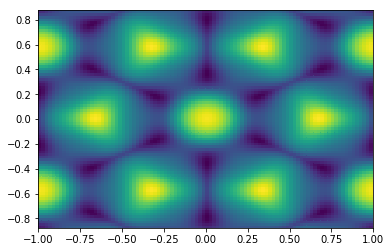

In [5]:
plt.pcolormesh(bsth['kxx'], bsth['kyy'], bsth['evb'][0,...])

In [136]:
nr, nc = bsth['kxx'].shape
kxvals = bsth['kxx'][:,0]
kyvals = bsth['kyy'][0,:]
xlen, ylen = 256, int(256/(nr/nc))
ofs = (xlen - ylen) // 2

In [138]:
bandaug, _, [kxx, kyy] = fuller.utils.interpolate2d(kxvals, kyvals, bsth['evb'][0,...], xlen, ylen, ret='all')

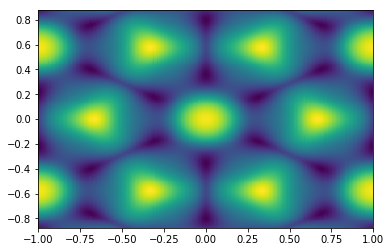

In [139]:
plt.pcolormesh(kxx, kyy, bandaug)

### Detect landmarks

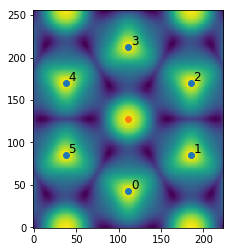

In [140]:
mc = aly.MomentumCorrector(image=bandaug)
mc.slice = mc.image
mc.featureExtract(image=mc.image, direction='ccw', method='daofind', sigma=15, fwhm=30)
mc.view(mc.image, points=mc.features, annotated=True, cmap='viridis')

In [141]:
mc.pouter_ord[0,:] - mc.pouter_ord[3,:]

array([-169.44167211,    0.        ])

### Synthesize artificial MPES data within the first Brillouin zone

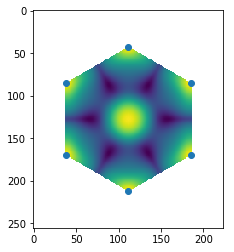

In [157]:
hm, margins = fuller.generator.hexmask(hexside=170, imside=256, padded=True, pad_left=43, pad_top=43, ret='all')
plt.imshow(hm[:,ofs:-ofs]*bandaug)
plt.scatter(mc.pouter_ord[:,1], mc.pouter_ord[:,0])

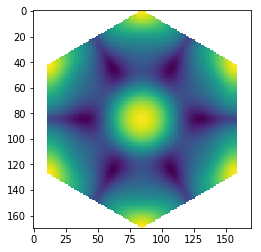

In [175]:
bandcut = cut_margins(bandaug, margins, offsetx=ofs)
hmcut = cut_margins(hm, margins)
bandhm = bandcut*hmcut
plt.imshow(bandhm)

In [178]:
bandhm_dmean = np.nan_to_num(bandhm - np.nanmean(bandhm))
bcf = fuller.generator.decomposition_hex2d(bandhm_dmean, nterms=400)

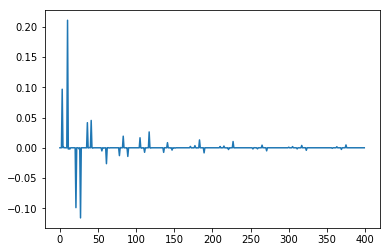

In [179]:
plt.plot(bcf)

In [ ]:
dg = fuller.generator.MPESDataGenerator()

### Simulate DFT error in initial estimates